# Exploring Datasets with Python

In this short demo we will analyse a given dataset from 1978, which contains information about politicians having affairs. 

To analyse it, we will use a [Jupyter Notebook](http://jupyter.org/), which is basically a *REPL++* for Python. Entering a command with shift executes the line and prints the result.

In [1]:
4 + 4

8

In [2]:
def sum(a, b):
    return a + b

sum(40, 2)

42

To work with common files like CSV, JSON, Excel files etc., we will use [Pandas](http://pandas.pydata.org/), _an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language_™. Let's import it!

In [3]:
import pandas as pd

Our dataset is given as a CSV file. Pandas provides an easy way to read our file with `read_csv`. The path of the file to read is relative to our notebook file. The path can also be an URL, supporting HTTP, FTP and also S3 if your data is stored inside an AWS S3 Bucket!

In [4]:
affairs = pd.read_csv('affairs.csv')

The first thing we will check is the size of our dataset. We can use `info()` to get the number of entries of each column.

In [5]:
affairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
sex           601 non-null object
age           601 non-null float64
ym            601 non-null float64
child         601 non-null object
religious     601 non-null int64
education     601 non-null int64
occupation    601 non-null int64
rate          601 non-null int64
nbaffairs     601 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 42.3+ KB


Now we know how many data is inside our file. Pandas is smart enough to parse the column titles by itself and estimate the data types of each column.

You may be curious how the data looks like. Let's see by using `head()`, which will print the first 5 rows.

In [6]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0


We can access a column of our dataset by using bracket notation and the name of the column.

In [7]:
affairs['sex'].head()

0      male
1    female
2    female
3      male
4      male
Name: sex, dtype: object

For categorical features like `sex`, you can also get the distributions of each value by using `value_counts()`.

In [8]:
affairs['sex'].value_counts()

female    315
male      286
Name: sex, dtype: int64

But what about numerical values? It definitly makes no sense to count each distinct value. Therefore, we can use `describe()`.

In [9]:
affairs['age'].describe()

count    601.000000
mean      32.487521
std        9.288762
min       17.500000
25%       27.000000
50%       32.000000
75%       37.000000
max       57.000000
Name: age, dtype: float64

You can also access values like `mean` or `max` directly with the corrsponding methods. Let's see who is the oldest cheater!

In [10]:
affairs['age'].max()

57.0

This works for the whole dataframe as well. Pandas knows which values are numerical based on the datatype and hides the categorical features for you.

In [11]:
affairs.describe()

,age,ym,religious,education,occupation,rate,nbaffairs
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780,1.455907
std,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179,3.298758
min,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000,0.000000
50%,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000,0.000000
75%,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000,0.000000
max,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000,12.000000


There is also an easy way to filter your dataset. Let's say we want to have a subset of our data containing only woman. This is also possible with the bracket notation!

In [12]:
affairs[affairs['sex'] == 'female'].head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
5,female,32.0,1.50,no,2,17,5,5,0
6,female,22.0,0.75,no,2,12,1,3,0
8,female,32.0,15.00,yes,4,16,1,2,0


The above statement returns a new dataframe (not a copy, modifying this data will modify the original as well), which can be accessed like before. Let's see how the numerical distribution is for our females.

In [13]:
affairs[affairs['sex'] == 'female'].describe()

,age,ym,religious,education,occupation,rate,nbaffairs
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,30.801587,8.017070,3.107937,15.257143,3.384127,3.939683,1.419048
std,8.646241,5.627237,1.134758,2.023879,1.929094,1.148045,3.309264
min,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,22.000000,1.500000,2.000000,14.000000,1.000000,3.000000,0.000000
50%,27.000000,7.000000,3.000000,16.000000,4.000000,4.000000,0.000000
75%,37.000000,15.000000,4.000000,17.000000,5.000000,5.000000,0.000000
max,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000,12.000000


We can also create new rows. Specify the new column name in brackets and provide a function to set the data. We will create a new column containing True or False, wheather or not the person is below 30.

In [14]:
affairs['below_30'] = affairs['age'] < 30

In [15]:
affairs['below_30'].value_counts()

False    325
True     276
Name: below_30, dtype: int64

In [16]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,below_30
0,male,37.0,10.00,no,3,18,7,4,0,False
1,female,27.0,4.00,no,4,14,6,4,0,True
2,female,32.0,15.00,yes,1,12,1,4,0,False
3,male,57.0,15.00,yes,5,18,6,5,0,False
4,male,22.0,0.75,no,2,17,6,3,0,True


We can use this to normalize our columns with better values. Take for example `religious`. The number have the following meaning: 1 = not, 2 = mildly, 3 = fairly, 4 = strongly. We can easily replace them inline with the following code.

In [17]:
rel_meanings = ['not', 'mildly', 'fairly', 'strongly']

In [18]:
affairs['religious'] = affairs['religious'].apply(lambda x: rel_meanings[min(x, 4)-1])

In [19]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,below_30
0,male,37.0,10.00,no,fairly,18,7,4,0,False
1,female,27.0,4.00,no,strongly,14,6,4,0,True
2,female,32.0,15.00,yes,not,12,1,4,0,False
3,male,57.0,15.00,yes,strongly,18,6,5,0,False
4,male,22.0,0.75,no,mildly,17,6,3,0,True


This should be enought about Pandas. Let's get some visualisations!

## Visualize Data

To visualize our data, we will use [Seaborn](https://seaborn.pydata.org), a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. Let's import it.

In [20]:
import seaborn as sns

To see our charts directly in our notebook, we have to execute the following:

In [21]:
%matplotlib inline
sns.set()
sns.set_context('talk')

Seaborn together with Pandas makes it pretty easy to create charts to analyze our data. We can pass our Dataframes and Series directly into Seaborn methods. We will see how in the following sections.

### Univariate Plotting

Let's start by visualizing the distribution of the age our our people. We can achieve this with a simple method called `distplot` by passing our series of ages as argument.

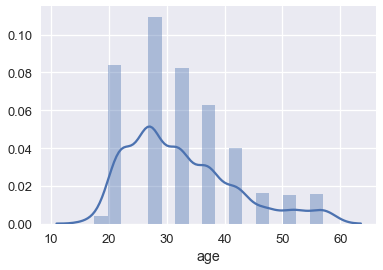

In [22]:
sns.distplot(affairs['age'])

The chart above calculates a kernel density as well. To get a real histogram, we have to disable the `kde` feature. We can also increase to number of buckets for our histogram by setting `bins` to a higher number.

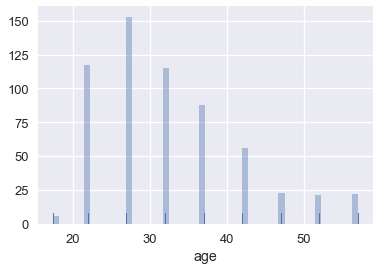

In [23]:
sns.distplot(affairs['age'], bins=50, rug=True, kde=False)

Interesting! The ages of the people in this dataset seem to end with two or seven.

We can do the same for every numerical column, e.g. the years of marriage.

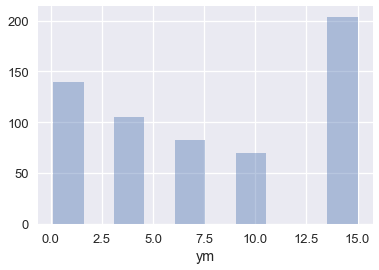

In [24]:
sns.distplot(affairs['ym'], bins=10, kde=False)

The average age of our people is around 32, but the most people are married for more than 14 years!

### Bivariate Plotting

Numbers get even more interesting when we can compare them to other numbers! Lets start comparing the number of years married vs the number of affairs. Seaborn provides us with a method called `jointplot` for this use case.

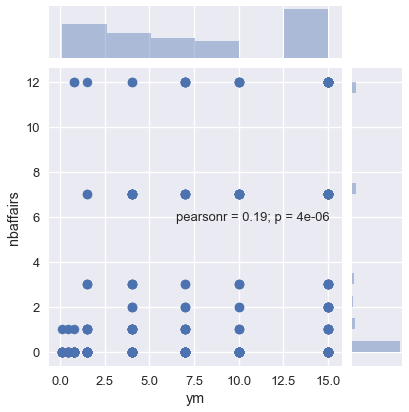

In [25]:
sns.jointplot(affairs['ym'], affairs['nbaffairs'])

To get a better feeling of how the number of affairs is affected by the number of years married, we can use a regression model by specifying `kind` as `reg`.

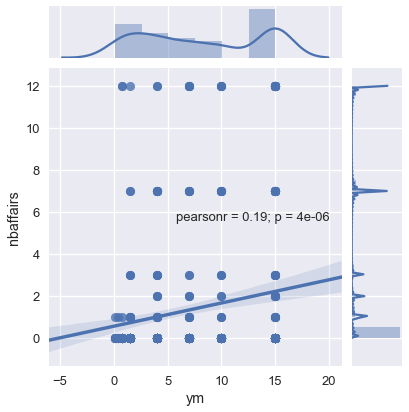

In [26]:
sns.jointplot(affairs['ym'], affairs['nbaffairs'], kind='reg')

We can also use a kernel to kompare the density of two columns against each other, e.g. `age` and `ym`.

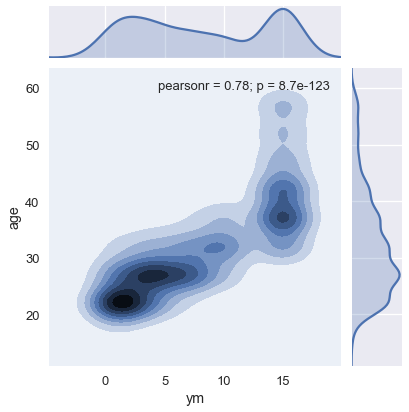

In [27]:
sns.jointplot(affairs['ym'], affairs['age'], kind='kde', shade=True)

We can get an even better comparison by plotting everything vs everything! Seaborn provides this with the `pairplot` method.

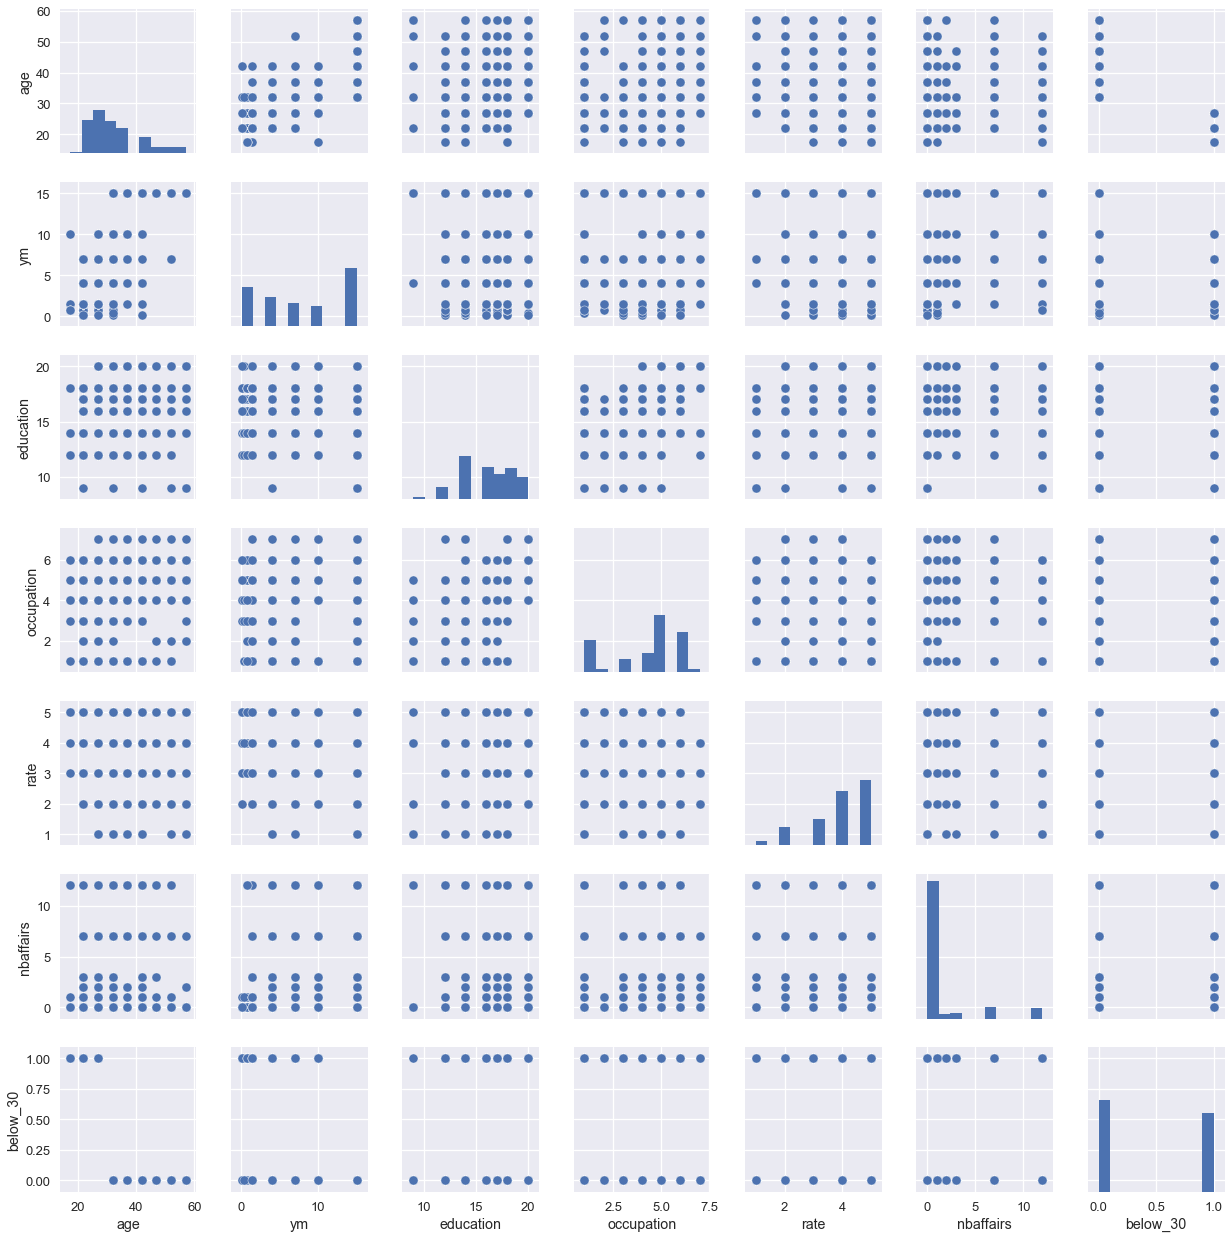

In [28]:
sns.pairplot(affairs)

You won't see any special in this data. We need to separate them by some kind of criteria. We can use our categorical values to do this! Seaborn uses a parameter called `hue` to do this. Let's separate our data by `sex` first. To make things even more interesting, let's create a regression for every plot, too!

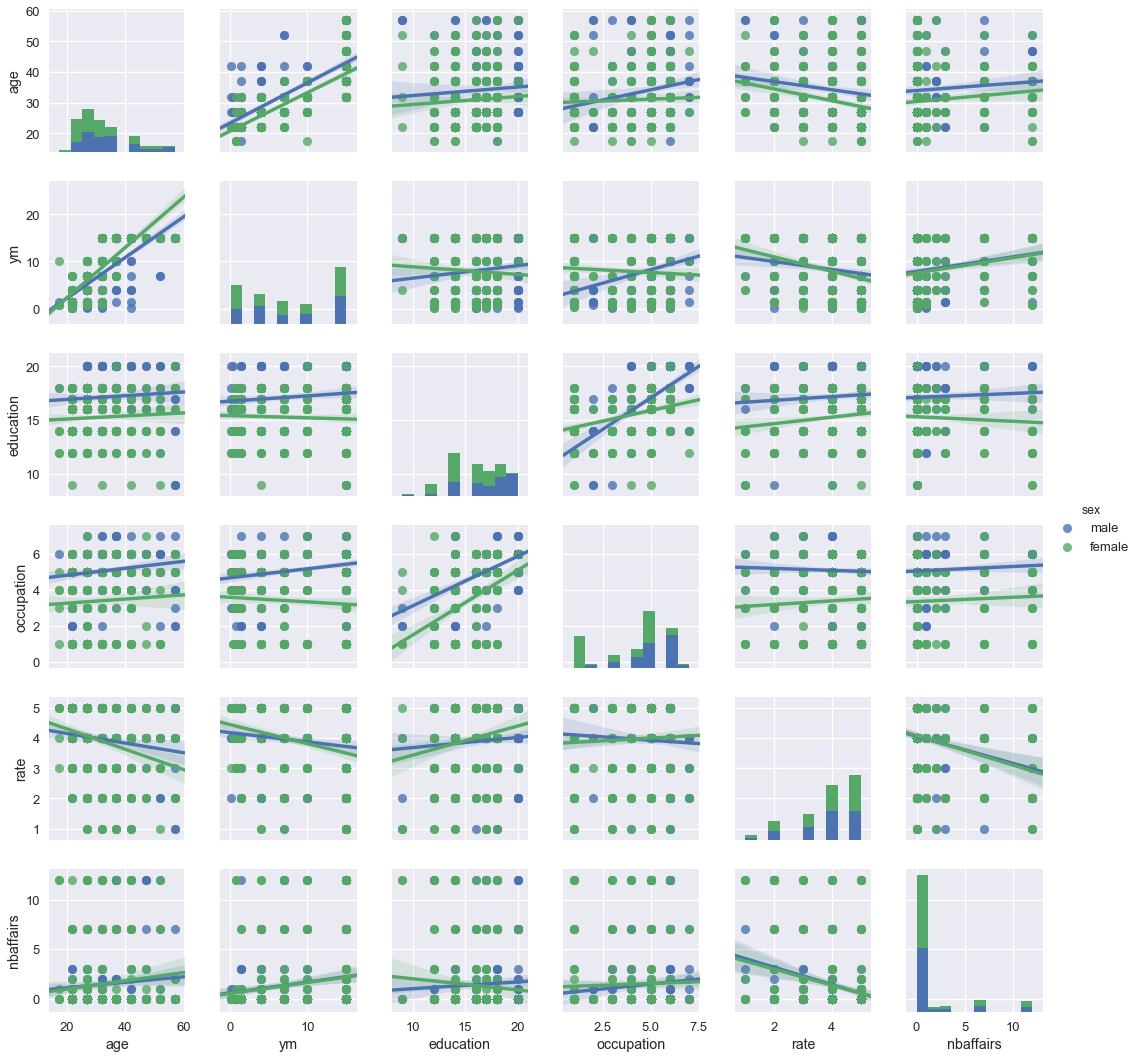

In [29]:
sns.pairplot(affairs.drop('below_30', axis=1), hue='sex', kind='reg')

To get even better separation, we can use `lmplot` to compare just the fields we need.

Let's say we're interested in the number of affairs vs years married. We also whant to separate them by `sex`, `child` and `religious`. We will use `sns.lmplot(x="ym", y="nbaffairs", hue="sex", col="child", row="religious", data=affairs)` to achieve this.

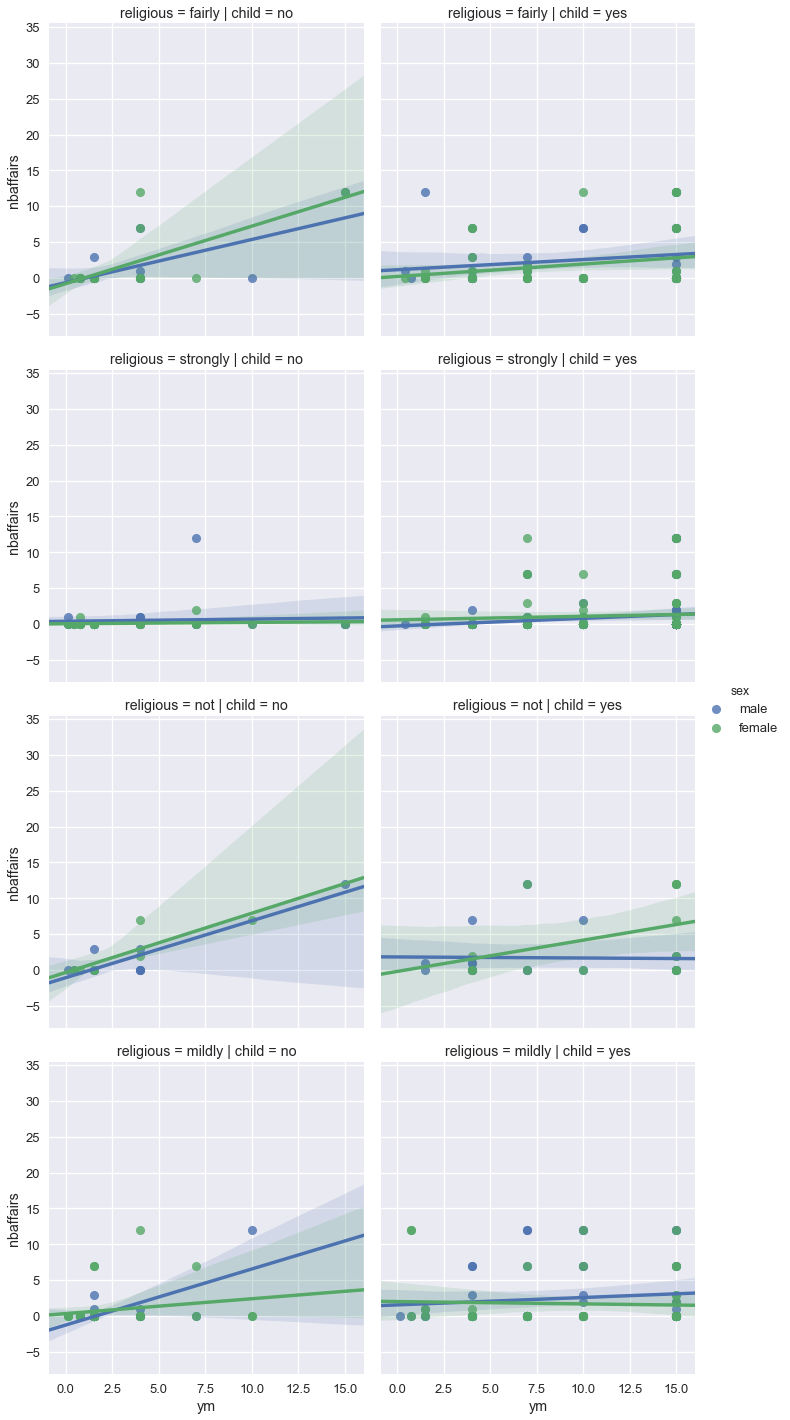

In [30]:
sns.lmplot(x="ym", y="nbaffairs", hue="sex", col="child", row="religious", data=affairs)

Here are some categorical plots to explore the dataset even further.

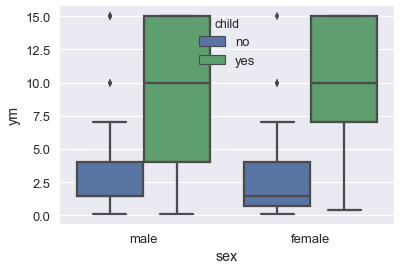

In [31]:
sns.boxplot(x="sex", y="ym", hue="child", data=affairs);

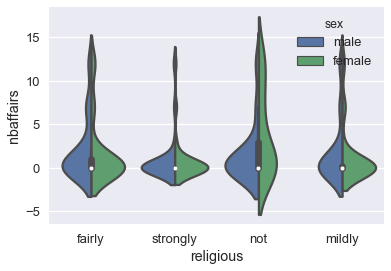

In [32]:
sns.violinplot(x="religious", y="nbaffairs", hue="sex", data=affairs, split=True);

We can also get the correlations between the values by using Pandas builtin method `corr()`.

In [33]:
affairs.corr()

,age,ym,education,occupation,rate,nbaffairs,below_30
age,1.000000,0.777546,0.134596,0.166413,-0.199000,0.095237,-0.775833
ym,0.777546,1.000000,0.040003,0.044592,-0.243119,0.186842,-0.763049
education,0.134596,0.040003,1.000000,0.533605,0.109303,-0.002437,-0.144546
occupation,0.166413,0.044592,0.533605,1.000000,0.017422,0.049612,-0.146437
rate,-0.199000,-0.243119,0.109303,0.017422,1.000000,-0.279512,0.181229
nbaffairs,0.095237,0.186842,-0.002437,0.049612,-0.279512,1.000000,-0.149754
below_30,-0.775833,-0.763049,-0.144546,-0.146437,0.181229,-0.149754,1.000000


Feed these stats into Seaborns `heatmap` method will provide us with the visual representation.

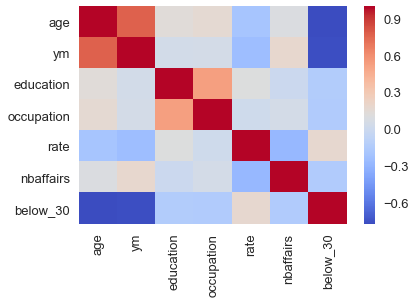

In [34]:
sns.heatmap(affairs.corr(), cmap='coolwarm')